<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machines
Using the Iris dataset in scikit learn use SVM to classify these flowers. The iris dataset can be loaded by the command "data = sns.load_dataset("iris")" after you import seaborn as sns!



The link to the google collab can be consulted by anyone with the link

Each visualisation will be done using multiplot with matplolib. The dimension of the figure will be 2x2.

In [24]:
# Import the necessary library and datasets
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
data = sns.load_dataset("iris")
data['species']=pd.factorize(data['species'])[0]


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [41]:
# Using a random state of 42, create a train/test set with a test set ratio of 0.20
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data['species'],test_size=0.2,random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [43]:
y_train.shape

(120,)

In [27]:
#Visualize the modeled svm classifiers with Iris Sepal features:

#Visualize the modeled svm classifiers using Iris Petal features

#In both cases use 4 kernels: linear kernel, linearSVC kernel, RBF kernel and polynomial kernel (degree 3) kernel.

#As a resource, check out the tutorial labeled "SVMs - Code SVMs in Python" in the previous page for more information!

svmlin=svm.SVC(kernel='linear',C=1)
svmSVC=svm.LinearSVC()
svmRBF=svm.SVC(kernel='rbf')
svmpoly=svm.SVC(kernel='poly',degree=3)


In [28]:
# Fit on the train set
for m in [svmlin,svmSVC,svmRBF,svmpoly]:
  m.fit(X_train_scaled,y_train)


In [29]:
# Support vectors
svmlinsv=svmlin.support_vectors_
svmRBFsv=svmRBF.support_vectors_
svmpolysv=svmpoly.support_vectors_

#Get LinearSVC support vector indices 
decision_function = svmSVC.decision_function(X_train_scaled)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
svmSVCsv= X_train_scaled[support_vector_indices]

In [30]:
# Model accuracy:
predlin=svmlin.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, predlin))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, predlin, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, predlin, average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667


In [31]:
# Model accuracy:
predrbf=svmRBF.predict(X_test_scaled)
print("Accuracy:",metrics.accuracy_score(y_test, predlin))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, predlin, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, predlin, average='weighted'))

Accuracy: 0.9666666666666667
Precision: 0.9694444444444444
Recall: 0.9666666666666667


SVC linear kernel score:  0.7631578947368421
Linear SVC score:  0.7631578947368421
SVC RBF kernel score:  0.7631578947368421
SVC polynomial kernel score:  0.7631578947368421


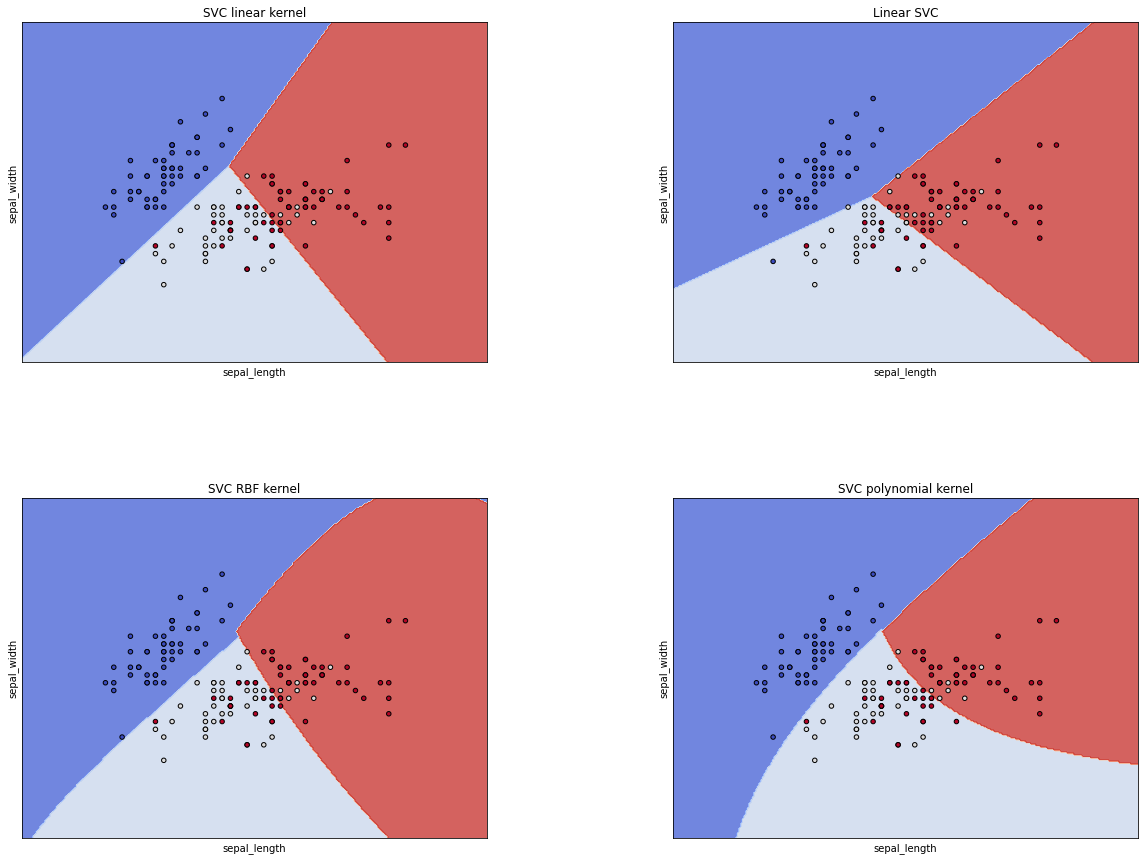

In [71]:
sepals = data[['sepal_length','sepal_width']]
sepal_names = sepals.columns
kernels = ["linear", "linear", "rbf", "poly"]
model_names = ['SVC linear kernel', 'Linear SVC', 'SVC RBF kernel', 'SVC polynomial kernel']

models = (svm.SVC(kernel='linear', C=1),
          svm.LinearSVC(C=1, max_iter=10000),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='poly', degree=3, C=1))

X = sepals
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for model, ax, model_name in zip(models, axes.flatten(), model_names):

  #modelSVM = svm.SVC(kernel = kernel)
  model.fit(X_train, y_train)
  my_predict = model.predict(X_test)

  x_min, x_max = sepals.iloc[:, 0].min() - 1, sepals.iloc[:, 0].max() + 1
  y_min, y_max = sepals.iloc[:, 1].min() - 1, sepals.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha = 0.8)
  ax.scatter(sepals.iloc[:, 0], sepals.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.update(dict(title=model_name, xlabel=sepal_names[0], ylabel=sepal_names[1]))
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])

  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  print(model_name, 'score: ', modelSVM.score(X_test, y_test))

SVC linear kernel score:  1.0
Linear SVC score:  0.9736842105263158
SVC RBF kernel score:  1.0
SVC polynomial kernel score:  1.0


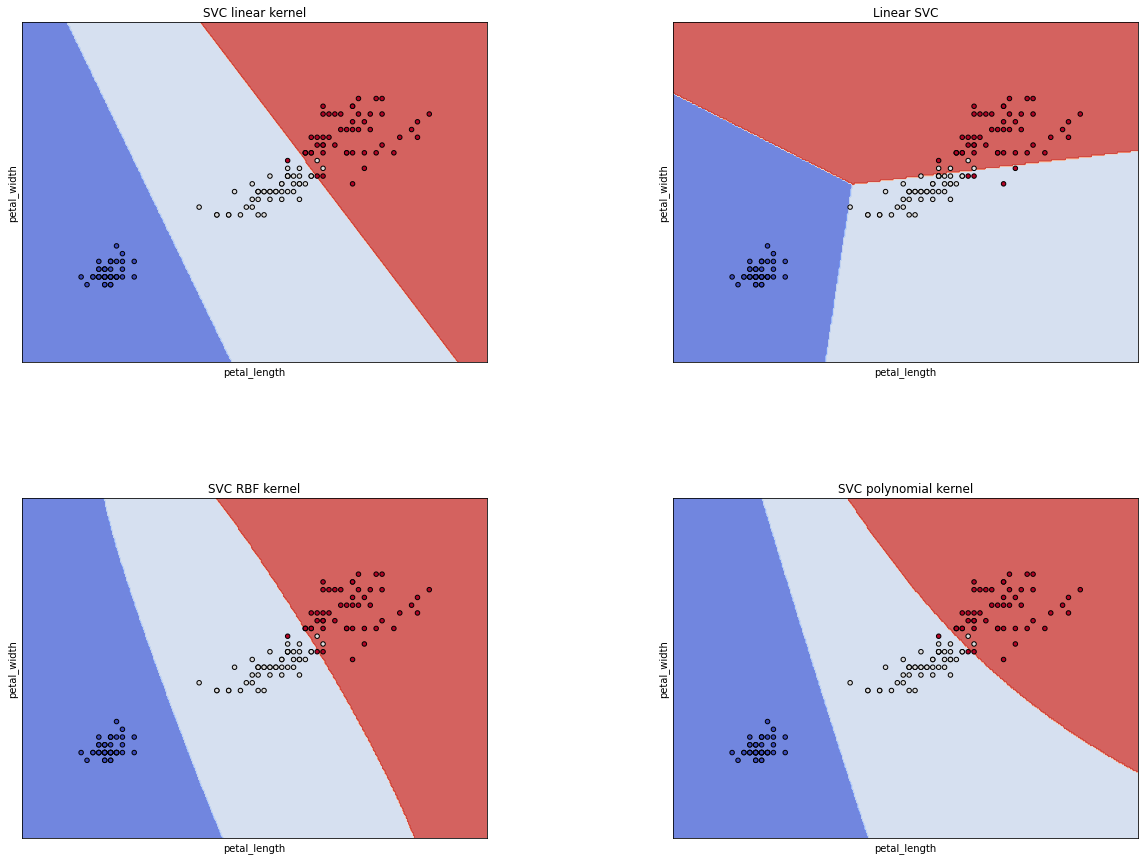

In [70]:
petals = data[['petal_length','petal_width']]
petals_names = petals.columns
kernels = ["linear", "linear", "rbf", "poly"]
model_names = ['SVC linear kernel', 'Linear SVC', 'SVC RBF kernel', 'SVC polynomial kernel']

models = (svm.SVC(kernel='linear', C=1),
          svm.LinearSVC(C=1, max_iter=10000),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='poly', degree=3, C=1))

X = petals
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for model, ax, model_name in zip(models, axes.flatten(), model_names):

  #modelSVM = svm.SVC(kernel = kernel)
  model.fit(X_train, y_train)
  my_predict = model.predict(X_test)

  x_min, x_max = petals.iloc[:, 0].min() - 1, petals.iloc[:, 0].max() + 1
  y_min, y_max = petals.iloc[:, 1].min() - 1, petals.iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha = 0.8)
  ax.scatter(petals.iloc[:, 0], petals.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.update(dict(title=model_name, xlabel=petals_names[0], ylabel=petals_names[1]))
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])

  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  print(model_name, 'score: ', model.score(X_test, y_test))